# ***Cleaning the Dataset***

In this Jupyter we make some data cleaning and feature engineering to prepare the best set of variables.

In [12]:
import pandas as pd
import numpy as np

## Import and explore:

In [19]:
data = pd.read_csv("DATA/train.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,Ideal,G,VS1,61.4,56.0,6.04,6.15,3.74,4372
3,3,1.55,Ideal,H,VS1,62.0,57.0,7.37,7.43,4.59,13665
4,4,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66,422


In [5]:
data.shape

(40455, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [8]:
data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [9]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Evaluating colinearity:

In [10]:
data.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.003349,0.007690,-0.007495,-0.003985,-0.003997,-0.003010,-0.004065
carat,-0.003349,1.000000,0.025563,0.181437,0.976119,0.968747,0.969643,0.921128
depth,0.007690,0.025563,1.000000,-0.297741,-0.028409,-0.031153,0.093987,-0.015052
table,-0.007495,0.181437,-0.297741,1.000000,0.195592,0.187326,0.154194,0.127691
x,-0.003985,0.976119,-0.028409,0.195592,1.000000,0.991276,0.986062,0.884874
y,-0.003997,0.968747,-0.031153,0.187326,0.991276,1.000000,0.980160,0.880575
z,-0.003010,0.969643,0.093987,0.154194,0.986062,0.980160,1.000000,0.875011
price,-0.004065,0.921128,-0.015052,0.127691,0.884874,0.880575,0.875011,1.000000


x, y and z are strongly correlated with carats (in fact, carat is a function of x,y,z)

In [20]:
data.drop(columns=["x","y","z"], inplace=True)

In [21]:
data.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,2692
2,2,0.84,Ideal,G,VS1,61.4,56.0,4372
3,3,1.55,Ideal,H,VS1,62.0,57.0,13665
4,4,0.30,Ideal,G,SI2,61.9,57.0,422


# Handling categorical data:

"cut" is a scaled feature, so it makes sense to be converted to numerical:

In [22]:
data.cut.unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [25]:
cutval = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}

In [30]:
data.cut = data.cut.apply(lambda x: cutval[x])

In [33]:
data.cut.unique()

array([5, 1, 3, 4, 2])

the same with "clarity" (see https://www.info-diamond.com/polished/clarity.html for info) :

In [24]:
data.clarity.unique()

array(['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [35]:
clarval = {"FL":12, "IF":11, "VVS1":10, "VVS2":9, "VS1":8, "VS2":7, "SI1":6, "SI2":5, "SI3":4, "I1":3, "I2":2, "I3":1}

In [36]:
data.clarity = data.clarity.apply(lambda x: clarval[x])

In [37]:
data.clarity.unique()

array([ 9,  7,  8,  5,  6, 10, 11,  3])

...and the same with color (https://www.info-diamond.com/polished/color.html) :

In [23]:
data.color.unique()

array(['G', 'H', 'F', 'J', 'E', 'I', 'D'], dtype=object)

In [48]:
colval = {"D":7, "E":6, "F":5, "G":4, "H":3, "I":2, "J":1}

In [49]:
data.color = data.color.apply(lambda x: colval[x])

In [51]:
data.color.unique()

array([4, 3, 5, 1, 6, 2, 7])

In [54]:
data.corr()

,id,carat,cut,color,clarity,depth,table,price
id,1.000000,-0.003349,0.000449,0.001828,-0.000040,0.007690,-0.007495,-0.004065
carat,-0.003349,1.000000,-0.134463,-0.292673,-0.354329,0.025563,0.181437,0.921128
cut,0.000449,-0.134463,1.000000,0.020104,0.194443,-0.219509,-0.433241,-0.052115
color,0.001828,-0.292673,0.020104,1.000000,-0.024248,-0.049141,-0.023844,-0.172244
clarity,-0.000040,-0.354329,0.194443,-0.024248,1.000000,-0.075435,-0.156728,-0.142408
depth,0.007690,0.025563,-0.219509,-0.049141,-0.075435,1.000000,-0.297741,-0.015052
table,-0.007495,0.181437,-0.433241,-0.023844,-0.156728,-0.297741,1.000000,0.127691
price,-0.004065,0.921128,-0.052115,-0.172244,-0.142408,-0.015052,0.127691,1.000000


In [55]:
data.corr().price

id        -0.004065
carat      0.921128
cut       -0.052115
color     -0.172244
clarity   -0.142408
depth     -0.015052
table      0.127691
price      1.000000
Name: price, dtype: float64

<AxesSubplot:>

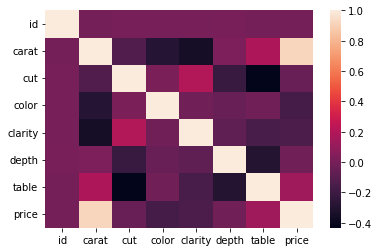

In [56]:
import seaborn as sns
sns.heatmap(data.corr())

# Now our data is ready for ML analysis

let's import it:

In [53]:
data.to_csv("DATA/clean_data.csv", index=False)

# Bonus:Trying a different approach:

In [ ]:
data = pd.read_csv("DATA/train.csv")
data.drop(columns=["x","y","z"], inplace=True)

cutval = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
data.cut = data.cut.apply(lambda x: cutval[x])

clarval = {"FL":12, "IF":11, "VVS1":10, "VVS2":9, "VS1":8, "VS2":7, "SI1":6, "SI2":5, "SI3":4, "I1":3, "I2":2, "I3":1}
data.clarity = data.clarity.apply(lambda x: clarval[x])

colval = {"D":7, "E":6, "F":5, "G":4, "H":3, "I":2, "J":1}
data.color = data.color.apply(lambda x: colval[x])